In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cb = pd.read_excel('df_credito_banco.xlsx')

In [ ]:
print(cb.dtypes)

Atividade                         object
Idade                              int64
Genero                            object
Dependentes                        int64
Escolaridade                      object
Estado_civil                      object
Renda                             object
Categoria_Cartao                  object
Meses_cliente                      int64
Numero_de_Produtos                 int64
Meses_inativos (ultimo ano)        int64
Numero_contatos (ultimo ano)       int64
Limite_Credito                     int64
Divida_Corrente                    int64
Limite_Disponivel                  int64
Numero_transacoes (ultimo ano)     int64
dtype: object


In [ ]:
cb

,Atividade,Idade,Genero,Dependentes,Escolaridade,Estado_civil,Renda,Categoria_Cartao,Meses_cliente,Numero_de_Produtos,Meses_inativos (ultimo ano),Numero_contatos (ultimo ano),Limite_Credito,Divida_Corrente,Limite_Disponivel,Numero_transacoes (ultimo ano)
0,Cliente Ativo,45,M,3,Ensino Médio,Casado,R$60K - R$80K,Azul,39,5,1,3,12691,777,11914,42
1,Cliente Ativo,49,F,5,Ensino Superior Completo,Solteiro,Menos que R$40K,Azul,44,6,1,2,8256,864,7392,33
2,Cliente Ativo,51,M,3,Ensino Superior Completo,Casado,R$80K - R$120K,Azul,36,4,1,0,3418,0,3418,20
3,Cliente Ativo,40,F,4,Ensino Médio,Desconhecido,Menos que R$40K,Azul,34,3,4,1,3313,2517,796,20
4,Cliente Ativo,40,M,3,Não possui,Casado,R$60K - R$80K,Azul,21,5,1,0,4716,0,4716,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Cliente Ativo,50,M,2,Ensino Superior Completo,Solteiro,R$40K - R$60K,Azul,40,3,2,3,4003,1851,2152,117
10123,Cliente Perdido,41,M,2,Desconhecido,Divorciado,R$40K - R$60K,Azul,25,4,2,3,4277,2186,2091,69
10124,Cliente Perdido,44,F,1,Ensino Médio,Casado,Menos que R$40K,Azul,36,5,3,4,5409,0,5409,60
10125,Cliente Perdido,30,M,2,Ensino Superior Completo,Desconhecido,R$40K - R$60K,Azul,36,4,3,3,5281,0,5281,62


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


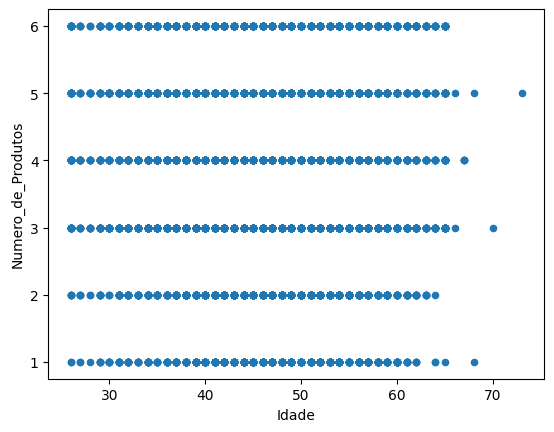

In [ ]:
ax = cb.plot.scatter(x='Idade',y='Numero_de_Produtos',colormap='viridis')

In [ ]:
#retirando atributos que atrapalham o treino do modelo
index_atributos_ret = []
for i in range(0,cb.shape[0]):
  if cb.iloc[i]['Idade'] >= 68:
    index_atributos_ret.append(i)

print(index_atributos_ret)

[151, 198, 251, 254]


<Axes: xlabel='Atividade', ylabel='Renda'>

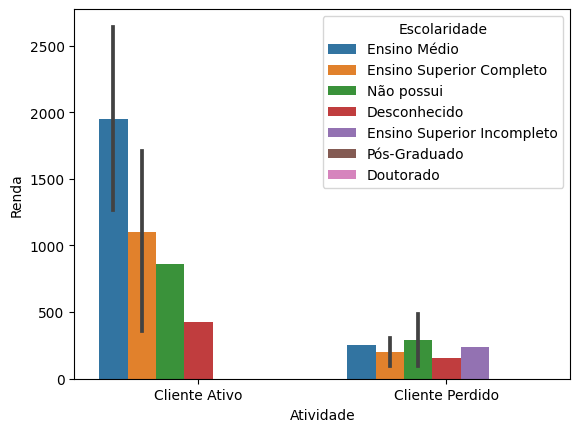

In [ ]:
view = cb.groupby(['Atividade','Escolaridade'])['Renda'].size().reset_index()
sns.barplot(data=view,x=view['Atividade'],y=view['Renda'],hue=cb['Escolaridade'])
#view

<Axes: xlabel='Numero_contatos (ultimo ano)', ylabel='Atividade'>

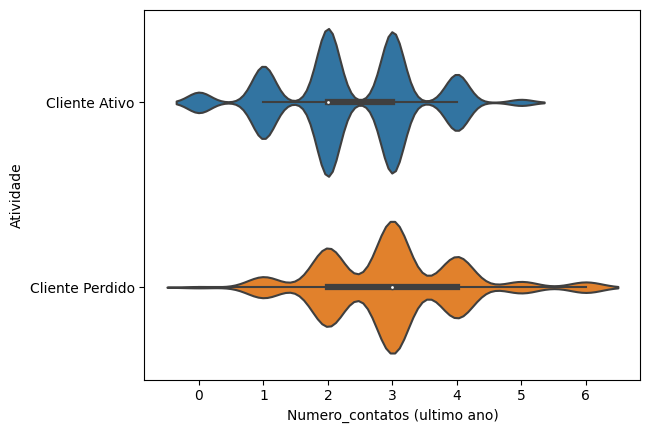

In [ ]:
sns.violinplot(data=cb,x=cb['Numero_contatos (ultimo ano)'], y=cb['Atividade'])

<Axes: xlabel='Numero_contatos (ultimo ano)', ylabel='Atividade'>

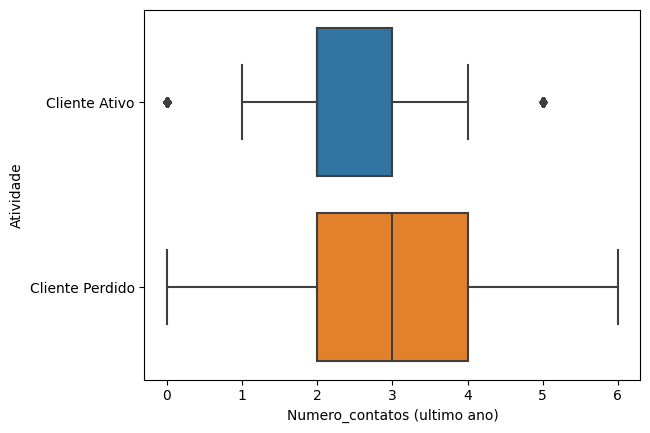

In [ ]:
sns.boxplot(data=cb,x=cb['Numero_contatos (ultimo ano)'], y=cb['Atividade'])

In [ ]:
new_cb = cb.drop(columns=['Categoria_Cartao','Numero_contatos (ultimo ano)', 'Limite_Disponivel','Estado_civil'])

In [ ]:
atributos = new_cb.iloc[0:,1:].values
resposta = new_cb['Atividade'].values

atributos

array([[45, 'M', 3, ..., 12691, 777, 42],
       [49, 'F', 5, ..., 8256, 864, 33],
       [51, 'M', 3, ..., 3418, 0, 20],
       ...,
       [44, 'F', 1, ..., 5409, 0, 60],
       [30, 'M', 2, ..., 5281, 0, 62],
       [43, 'F', 2, ..., 10388, 1961, 61]], dtype=object)

In [ ]:
##atributos2 = atributos.drop_duplicates()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#transformando atributos que não são numéricos
label_encoder = LabelEncoder()

categorias_index = [0]

atributos[:,1] = label_encoder.fit_transform(atributos[:,1])
atributos[:,3] = label_encoder.fit_transform(atributos[:,3])
atributos[:,4] = label_encoder.fit_transform(atributos[:,4])

In [ ]:
label_encoder2 = LabelEncoder()

In [ ]:
#tranformando a variável resposta
resposta = label_encoder2.fit_transform(resposta)
print(resposta)
print(label_encoder2.classes_)

[0 0 0 ... 1 1 1]
['Cliente Ativo' 'Cliente Perdido']


In [ ]:
#separando teste e treino
#treino = para o modelo aprender
#tesete = para ver se o modelo aprendeu
from sklearn.model_selection import train_test_split

atributos_treino, atributos_teste, resposta_treino, resposta_teste = train_test_split(atributos, resposta, test_size = 0.25, random_state=0)

In [ ]:
#treinando o modelo
from sklearn.naive_bayes import GaussianNB
classificador_bayes = GaussianNB()
classificador_bayes.fit(atributos_treino, resposta_treino)

GaussianNB()

In [ ]:
classificacao = classificador_bayes.predict(atributos_teste)

print(classificacao)
print(resposta_teste)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# acuracia
taxa_acerto = accuracy_score(resposta_teste, classificacao)
print(taxa_acerto)

0.8992890995260664


[[2110   38]
 [ 217  167]]


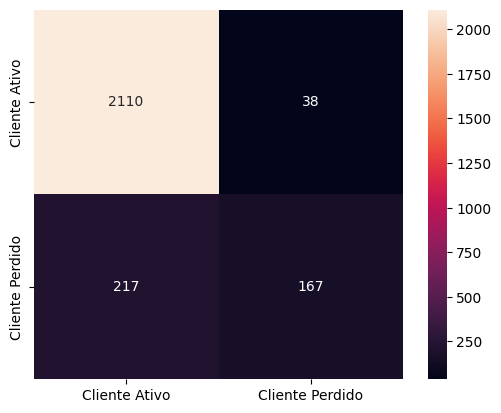

In [ ]:
matriz_confusao = confusion_matrix(resposta_teste,classificacao)
print(matriz_confusao)

sns.heatmap(matriz_confusao, square=True, annot=True, cbar=True, yticklabels= label_encoder2.classes_,xticklabels=label_encoder2.classes_, fmt='d')
plt.show()